In [1]:
import numpy as np
from numpy import linalg as LA
# https://numpy.org/doc/stable/reference/routines.linalg.html
# from statistics import 
# https://numpy.org/doc/stable/reference/routines.statistics.html


import scipy
from scipy import linalg
# https://docs.scipy.org/doc/scipy/reference/linalg.html
from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/stats.html

In [17]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
D = np.array([[10,1,2,7.0],[7,2,1,10],[2,9,7,3],[3,6,10,2]])
MD = np.mean(D, axis = 1)
DM = D - MD
print(D)
print(DM)

[[10.  1.  2.  7.]
 [ 7.  2.  1. 10.]
 [ 2.  9.  7.  3.]
 [ 3.  6. 10.  2.]]
[[ 5.   -4.   -3.25  1.75]
 [ 2.   -3.   -4.25  4.75]
 [-3.    4.    1.75 -2.25]
 [-2.    1.    4.75 -3.25]]


In [19]:
A = np.dot(DM.T,DM)
w, v = scipy.linalg.eigh(A)
print(w)
print(v)

[3.47320808e-03 3.99711359e+00 1.62873002e+01 1.59212113e+02]
[[ 0.51868181 -0.48091367 -0.5188915   0.48004463]
 [ 0.48141168 -0.51899231  0.51905638 -0.47903053]
 [ 0.47851555  0.47796009 -0.48086562 -0.55798323]
 [ 0.51984118  0.52050282  0.47968776  0.4782694 ]]


In [20]:
v1 = v[:,3]
v2 = v[:,2]
print("v1 = ", v1)
print("v2 = ", v2)
# interpretar las componentes de los autovectores

v1 =  [ 0.48004463 -0.47903053 -0.55798323  0.4782694 ]
v2 =  [-0.5188915   0.51905638 -0.48086562  0.47968776]


In [6]:
pca1 = np.dot(DM,v1)
pca2 = np.dot(DM,v2)
print("pca1 = ", pca1)
print("pca2 = ", pca2)
# proyecciones de los vectores en el 
# plano spanned por v1 y v2 
# interpretar tamano relativo de las coordenandas

pca1 =  [ 6.96676221  7.04038924 -5.40883282 -5.64391567]
pca2 =  [-2.26841615  1.72724362  1.71208771 -2.28625754]


In [21]:
A_aprox = MD + pca1[0]*v1 + pca2[0]*v2
B_aprox = MD + pca1[1]*v1 + pca2[1]*v2
C_aprox = MD + pca1[2]*v1 + pca2[2]*v2
D_aprox = MD + pca1[3]*v1 + pca2[3]*v2
print ("A_aprox =", A_aprox.T)
print ("A_exact =", D[0,:])
print ("B_aprox =", B_aprox.T)
print ("B_exact =", D[1,:])
print ("C_aprox =", C_aprox.T)
print ("C_exact =", D[2,:])
print ("D_aprox =", D_aprox.T)
print ("D_exact =", D[3,:])
# Notar que es una muy buena aproximacion 2-D a un problema 4-D
# explicarlo.

A_aprox = [9.52141862 0.4852723  2.45346689 7.49385775]
A_exact = [10.  1.  2.  7.]
B_aprox = [7.483449   2.5239754  0.49100883 9.44574039]
B_exact = [ 7.  2.  1. 10.]
C_aprox = [1.51513111 8.47966612 7.44475387 3.48438826]
C_exact = [2. 9. 7. 3.]
D_aprox = [3.4769882  6.51691138 9.49859292 1.45399805]
D_exact = [ 3.  6. 10.  2.]


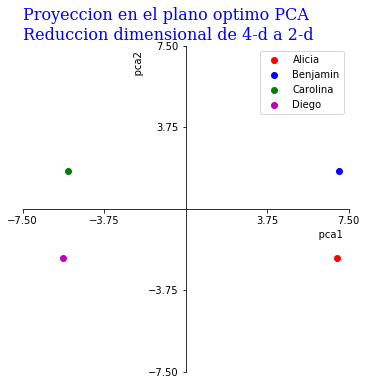

In [15]:
x = pca1.reshape(4,)
y = pca2.reshape(4,)

fig, ax = plt.subplots(figsize=(6,6))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 7.5
ax.set_xticks([-1*l,-0.5*l, 0.5*l, 1*l])
ax.set_yticks([-1*l,-0.5*l, 0.5*l, 1*l])


ax.set_title("Proyeccion en el plano optimo PCA \nReduccion dimensional de 4-d a 2-d", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(pca1[0], pca2[0], s=None, color = "r",label="Alicia")
ax.scatter(pca1[1], pca2[1], s=None, color = "b",label="Benjamin")
ax.scatter(pca1[2], pca2[2], s=None, color = "g",label="Carolina")
ax.scatter(pca1[3], pca2[3], s=None, color = "m",label="Diego")


# sorry... no tengo tiempo
plt.xlabel("                                                                                             pca1")
plt.ylabel('                                                                                             pca2')
ax.legend()

plt.show()